# Introduction

In this tutorial, we will do face recognition using the SVM. 

Humans are able to recognize familiar faces almost instantly, seemingly without any effort. Here, we will design a machine learning system to perform this task. The applications are endless (surveillance, targeted marketing in malls etc.) when we leave it to the machines!

Face recognition is the task of identifying a person from an image of the person's face. This can be treated as a classification problem where we assign a label (ie. person's name) to an image of a face.

Labeled Faces in the Wild (LFW) is a database of face photographs designed for studying the problem of unconstrained face recognition. This database was created and maintained by researchers at the University of Massachusetts, Amherst (specific references are in Acknowledgments section). 13,233 images of 5,749 people were detected and centered by the Viola Jones face detector and collected from the web. 1,680 of the people pictured have two or more distinct photos in the dataset. The original database contains four different sets of LFW images and also three different types of "aligned" images. According to the researchers, deep-funneled images produced superior results for most face verification algorithms compared to the other image types. Hence, the dataset uploaded here is the deep-funneled version.

**Dataset description**

This dataset is a collection of JPEG pictures of famous people collected over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/
Each picture is centered on a single face. The typical task is called Face Verification: given a pair of two pictures, a binary classifier must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is: given the picture of the face of an unknown person, identify the name of the person by referring to a gallery of previously seen pictures of identified persons. Both Face Verification and Face Recognition are tasks that are typically performed on the output of a model trained to perform Face Detection. 

**References:**

Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. Gary B. Huang, Manu Ramesh, Tamara Berg, and Erik Learned-Miller. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.


# Data Retrieval 

In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
faces = fetch_lfw_people(min_faces_per_person=80)

# Data exploration

In [3]:
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


In [4]:
n_samples = faces.images.shape[0]
n_features = faces.data.shape[1]
n_classes = faces.target_names.shape[0]

In [5]:
print(f'Numbers of samples: {n_samples}')
print(f'Numbers of features: {n_features}')
print(f'Numbers of classes: {n_classes}')

Numbers of samples: 1140
Numbers of features: 2914
Numbers of classes: 5


In [6]:
faces.data.shape

(1140, 2914)

Let’s plot a few of these faces to see what we’re working with

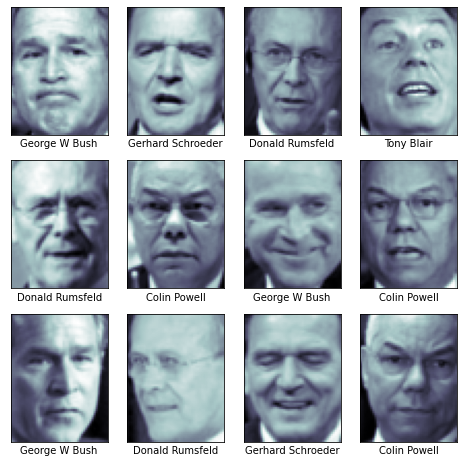

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 4, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

# Build a SVM model to classify face recognition

## Splitting the dataset into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, train_size = 0.8, random_state=0)

In [9]:
X_train.shape

(912, 2914)

In [10]:
X_test.shape

(228, 2914)

In [11]:
y_train.shape

(912,)

In [12]:
y_test.shape

(228,)

## Build a SVM model

In [13]:
# import support vector classification model
from sklearn.svm import SVC

model = SVC()

## Training the model and make a prediction

In [14]:
model.fit(X_train, y_train)

SVC()

In [15]:
y_pred = model.predict(X_test)

## Evaluate the model

In [16]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.8289473684210527
Precision: 0.8644123119742315
Recall: 0.8289473684210527
F1-score: 0.8188102177533398


**The Classification report**

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test, y_pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.92      0.90      0.91        49
  Donald Rumsfeld       0.94      0.59      0.73        27
    George W Bush       0.74      1.00      0.85        98
Gerhard Schroeder       1.00      0.46      0.63        24
       Tony Blair       1.00      0.67      0.80        30

         accuracy                           0.83       228
        macro avg       0.92      0.72      0.78       228
     weighted avg       0.86      0.83      0.82       228



**Confusion matrix visualization with heatmap**

In [20]:
import seaborn as sns

Text(101.4, 0.5, 'Predicted label')

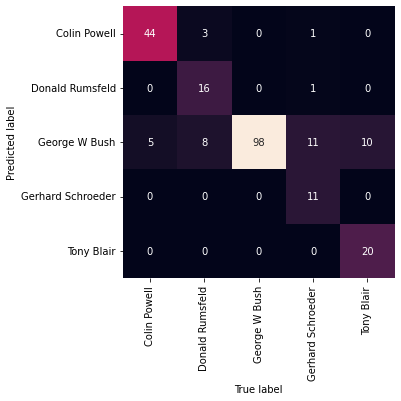

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=faces.target_names,
yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [22]:
params = model.get_params()

In [23]:
params

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Parameters Tunning

Finally, we can use a grid search cross-validation to explore combinations of parameters.Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function (RBF) kernel), and determine the best model:

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
model = SVC()

**Parameters setup**

In [26]:
param_grid = [{'C': [0.5, 0.1, 1, 5, 10], 'kernel': ['linear'], 'class_weight': ['balanced']},
  {'C': [0.5, 0.1, 1, 5, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.005, 0.05, 0.5], 
   'kernel': ['rbf'], 'class_weight': ['balanced']}]

**Running the Grid Search on parameters and fit the trainning data**

In [27]:
grs = GridSearchCV(model, param_grid)

**Output the best values**

In [28]:
grs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.5, 0.1, 1, 5, 10],
                          'class_weight': ['balanced'], 'kernel': ['linear']},
                         {'C': [0.5, 0.1, 1, 5, 10],
                          'class_weight': ['balanced'],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.005, 0.05, 0.5],
                          'kernel': ['rbf']}])

In [29]:
print("Best Hyper Parameters:",grs.best_params_)

Best Hyper Parameters: {'C': 0.5, 'class_weight': 'balanced', 'kernel': 'linear'}


**Make a prediction and calculate metrics**

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen.

In [30]:
model_best = grs.best_estimator_

In [31]:
y_pred = model_best.predict(X_test)

**Evaluate the model**

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.8903508771929824
Precision: 0.8917499865613072
Recall: 0.8903508771929824
F1-score: 0.88937838700414


Text(111.12, 0.5, 'Predicted label')

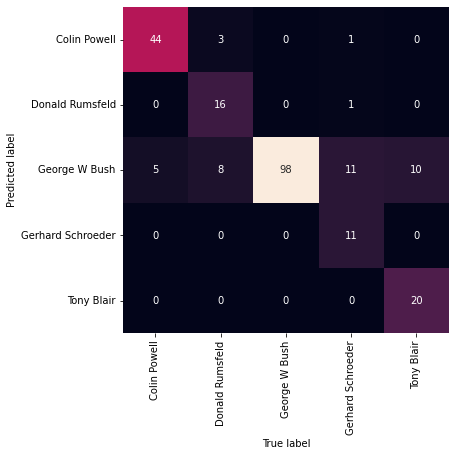

In [33]:
plt.figure(figsize=(8,6))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=faces.target_names,
yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')

**Display misclassified faces**

Let’s take a look at a few of the test images along with their predicted values.

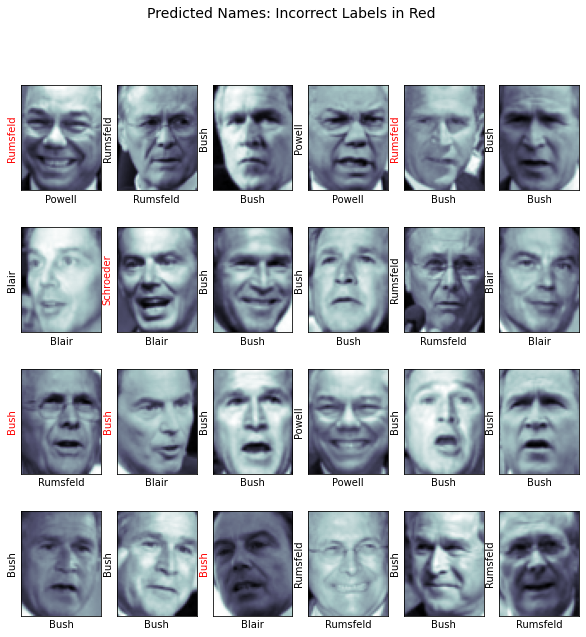

In [34]:
fig, ax = plt.subplots(4, 6, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(faces.target_names[y_test[i]].split()[-1])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
    color='black' if y_pred[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names: Incorrect Labels in Red', size=14);

Out of this small sample, our optimal estimator mislabeled only a several faces (e,g. Bush’s face in the bottom row was mislabeled 
as Blair).